In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

In [2]:
from Wordle import Wordle, dict_words

In [3]:
w = Wordle()

In [4]:
w.answer

'pudus'

In [5]:
w.greedy_strategy(verbose=True)

Guessing: clean
Guessing: musth
Guessing: puris
Guessing: pukus
Guessing: pupus
Guessing: pudus


In [6]:
N = 1000

In [14]:
num_guesses = list()
guesses = list()
for i in tqdm(range(1000)):
    w = Wordle()
    w.greedy_strategy()
    guesses.append(w.guesses)
    num_guesses.append(len(w.guesses))
    
num_guesses = np.array(num_guesses)

100%|███████████████████████████████████████| 1000/1000 [33:09<00:00,  1.99s/it]


In [31]:
values, counts = np.unique(num_guesses, return_counts=True)
counts_df = pd.DataFrame(
    data=np.stack([values, counts], axis=-1),
    columns=['num_guesses', 'count']
)

counts_df = (
    counts_df
    .sort_values('num_guesses')
    .reset_index(drop=True)
)
counts_df['cum_count'] = counts_df['count'].cumsum()
counts_df['cum_rate'] = counts_df['cum_count']/(counts_df['cum_count'].iloc[-1])

In [32]:
counts_df

,num_guesses,count,cum_count,cum_rate
0,2,9,9,0.009
1,3,98,107,0.107
2,4,294,401,0.401
3,5,268,669,0.669
4,6,174,843,0.843
5,7,72,915,0.915
6,8,45,960,0.960
7,9,22,982,0.982
8,10,10,992,0.992
9,11,5,997,0.997


/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_900/4233600694.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


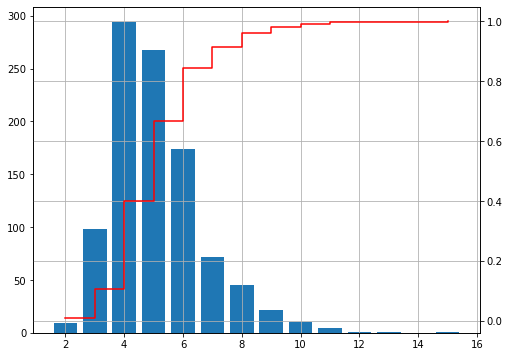

In [38]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()

ax1.bar(
    counts_df['num_guesses'],
    counts_df['count']
)
ax2.step(
    counts_df['num_guesses'],
    counts_df['cum_rate'],
    where='post',
    color='red'
)

ax2.grid(axis='y')
ax1.grid(axis='x')

fig.show()

In [16]:
values, counts

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15]),
 array([  9,  98, 294, 268, 174,  72,  45,  22,  10,   5,   1,   1,   1]))

In [17]:
pd.DataFrame(num_guesses).describe()

,0
count,1000.000000
mean,5.129000
std,1.617088
min,2.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,15.000000


In [18]:
(num_guesses == np.max(num_guesses)).nonzero()

(array([33]),)

In [21]:
guesses[33]

['becks',
 'lolls',
 'pulls',
 'rills',
 'hills',
 'sills',
 'yills',
 'fills',
 'jills',
 'dills',
 'tills',
 'nills',
 'wills',
 'gills',
 'mills']

In [22]:
(num_guesses == 8).nonzero()

(array([  3,   4,  12,  35,  51,  73,  83, 104, 151, 187, 230, 240, 249,
        276, 291, 339, 345, 377, 403, 430, 467, 472, 482, 565, 590, 608,
        616, 617, 630, 641, 655, 709, 723, 845, 846, 857, 874, 881, 907,
        923, 935, 942, 955, 968, 978]),)

In [23]:
guesses[3]

['tians', 'lovey', 'germy', 'reeky', 'reddy', 'refry', 'rebuy', 'reccy']

In [24]:
guesses[4]

['eikon', 'bitsy', 'vills', 'fiqhs', 'riffs', 'ziffs', 'jiffs', 'diffs']

In [25]:
len(num_guesses[num_guesses <= 6])/(len(num_guesses))

0.843